In [ ]:
Pkg.add("LibExpat"); using LibExpat
Pkg.add("Winston"); using Winston

Pkg.clone("MXNet");
ENV["MXNET_HOME"] = "/mxnet"
Pkg.add("GraphPlot");
Pkg.add("NetworkViz");
Pkg.add("PyPlot");
Pkg.add("MLBase")

In [ ]:
Pkg.add("GraphPlot");

In [1]:
using MXNet
using GraphPlot

In [2]:
using LightGraphs
import LightGraphs.SimpleGraphs: SimpleEdge, SimpleDiGraph
include("CreateOSMGraphs.jl")
using CreateOSMGraphs


Use "const Styles = @compat Union{Style,Dict{Int,Style}}" instead.


In [3]:
osm_fn = "northern_stockholm.osm"

"northern_stockholm.osm"

In [4]:
@time graph, vprops, eprops, edgeDict, 
nodesLLA, highways, geohash2edgedict = CreateOSMGraphs.CreateOSMGraph(osm_fn);

getOSMData
 22.844424 seconds (251.67 M allocations: 10.940 GiB, 34.97% gc time)
intersections
  0.005296 seconds (24.55 k allocations: 2.920 MiB)
roadways
  0.011797 seconds (5.36 k allocations: 575.423 KiB)
segmentHighways
  0.253440 seconds (289.29 k allocations: 9.692 MiB)
createGraph
  0.417143 seconds (1.91 M allocations: 74.419 MiB, 16.04% gc time)
 24.970508 seconds (254.70 M allocations: 11.068 GiB, 32.33% gc time)


In [5]:
graphNodeId2MapNodeId = Dict()

locs_x = Array{Float64, 1}(nv(graph))
locs_y = Array{Float64, 1}(nv(graph))

for (k, v) in sort(vprops, by=x -> vprops[x])
    graphNodeId2MapNodeId[v] = k
    println(nodesLLA[k].coords.lat, ",", nodesLLA[k].coords.lon)
    
    locs_x[v] = nodesLLA[k].coords.lon
    locs_y[v] = nodesLLA[k].coords.lat
end

59.4048694,17.9409198
59.3479227,18.0300213
59.3978055,17.8827928
59.4223701,17.8572134
59.3923518,18.0460295
59.3470279,17.8938963
59.3559978,17.9481098
59.3587283,17.9966055
59.3786329,18.0128975
59.4347686,18.001137
59.3991921,17.9823037
59.3498679,18.0451873
59.3864215,17.9390323
59.3475125,18.004639
59.3518059,17.9566719
59.4085271,18.019
59.4014547,17.9712111
59.3581566,17.9751434
59.3533616,17.9198966
59.3889355,17.8255881
59.3612971,17.9653226
59.3758198,17.9707441
59.4066667,17.8419661
59.4251456,17.8238364
59.4400075,18.0430397
59.3327128,17.9801786
59.3365941,17.9908026
59.4193234,17.9137125
59.392082,17.8700651
59.3512107,18.0437213
59.3501952,18.0382405
59.3814577,17.978106
59.396298,17.9511611
59.4028937,17.9435934
59.4341759,18.0016381
59.3715755,18.017518
59.4372311,17.9907863
59.4373389,17.9257411
59.3415023,17.9614384
59.3347063,17.9684336
59.4098845,18.0325786
59.3394885,18.0366458
59.3880785,17.8885217
59.4105799,17.768552
59.3617132,18.0001366
59.4144859,17.9299212

59.3310499,17.9187639
59.3375255,17.934463
59.3697329,17.9425777
59.3407261,18.0145609
59.365277,17.958166
59.4058008,17.8681324
59.3857112,17.9235744
59.3444242,18.0093805
59.4146553,17.9351101
59.4405347,17.9301046
59.4293858,17.9518746
59.4094202,17.9622737
59.3619323,17.940175
59.3949439,17.8990475
59.334043,18.0355983
59.4417855,17.7938682
59.3716453,18.0171949
59.3429653,18.0464195
59.3493536,18.0271798
59.4422896,17.7932573
59.4148988,17.8769231
59.3420399,18.0473869
59.416161,17.8312618
59.4193217,17.9141942
59.3545778,18.0364799
59.3643979,18.0237616
59.3471562,18.0316461
59.3786921,18.0129971
59.3848493,18.0427713
59.3311587,18.0307809
59.423504,17.9478542
59.3308362,18.0099649
59.3444787,17.9657372
59.3490007,18.0413946
59.3999798,18.0157303
59.4097657,18.0338435
59.415481,17.8774987
59.3765225,17.972084
59.3530325,18.0388168
59.4315618,17.9215512
59.3841193,17.997966
59.401277,17.9668434
59.3987607,17.8843774
59.4112554,17.8962085
59.3739238,18.0010697
59.3285909,18.0214417

59.3780429,18.0107864
59.3319408,18.0239419
59.3360244,17.9520611
59.420017,17.9236126
59.4360471,17.9979117
59.3974369,17.9094134
59.4171738,17.9313981
59.4379232,17.9928016
59.4360852,17.9990128
59.3450872,18.0401192
59.3442017,18.0207454
59.3742332,17.9268225
59.3987548,17.9501427
59.3962881,17.9150465
59.4412736,17.950063
59.3878244,17.866677
59.3302346,18.0210123
59.358401,17.9985231
59.4253556,17.8239707
59.4102494,17.9698918
59.3469021,17.9278425
59.4259891,17.8507082
59.3987978,17.9007782
59.3873992,18.0037669
59.3328365,18.0290942
59.3347817,17.9075924
59.3991363,17.8940313
59.34572,18.0339544
59.3859913,17.891962
59.3812098,17.9450151
59.3908171,17.8867394
59.3328389,17.9865444
59.393929,17.9871886
59.350454,18.0246592
59.3288006,17.9383936
59.3689441,18.0067233
59.4001223,17.8882735
59.3414953,17.9613089
59.4357533,17.9403737
59.4116646,18.0284789
59.4406674,17.9316979
59.348907,18.0415896
59.372404,18.0081949
59.38834,17.8033164
59.3462142,18.0270494
59.41587,17.9328961
59.

59.4028614,17.9748458
59.3364186,18.0481104
59.3613498,17.977223
59.3921651,18.0456065
59.3845353,17.9371174
59.4078294,18.0338047
59.3317787,18.0201922
59.3335474,17.9769874
59.3291447,17.945671
59.3776432,18.0033502
59.379855,18.0264758
59.3453717,18.0285382
59.370488,17.8796259
59.3894405,18.0425752
59.3283395,18.0087308
59.3599663,18.0279267
59.3809063,17.9888803
59.3898374,17.9455186
59.3319649,18.0282537
59.3505629,17.8160825
59.3687546,18.0068384
59.4277023,17.9534872
59.3471195,17.8937057
59.3286563,17.9549751
59.442828,17.9359774
59.3321159,18.0493934
59.3718371,17.8622137
59.3432183,18.0269376
59.3953467,17.8894926
59.4011039,17.8853094
59.3819448,17.9724868
59.3675963,17.9657888
59.3530185,18.0531084
59.3883949,17.9690953
59.3554669,18.0127474
59.4286469,17.9524364
59.4344052,18.0379063
59.3536346,18.0329153
59.3856447,17.9238967
59.433866,18.00245
59.4052623,17.9392717
59.3794648,18.0384301
59.3567426,17.9105563
59.414447,18.0401649
59.3665467,18.0021322
59.3987839,18.03752

59.3485735,18.0320809
59.3867764,17.9334599
59.3780957,17.8484912
59.3642432,18.022865
59.3315899,18.0188037
59.3312832,17.8501639
59.4217975,17.861727
59.3378016,17.9368868
59.3716309,17.9365572
59.3648865,17.9424113
59.3708207,18.0051458
59.3608443,17.9755675
59.4107407,18.0343564
59.361314,17.9429472
59.4257409,17.9543131
59.3378973,18.0078836
59.3824156,17.9361496
59.4125533,17.8598165
59.3333613,17.9897672
59.3586761,17.9807736
59.3334557,17.991209
59.441947,18.0045579
59.3332081,17.9897544
59.4082504,17.9851856
59.333727,18.0384622
59.4024986,17.9727961
59.39319,17.9269583
59.3725303,18.0033135
59.3788244,17.9769003
59.3424797,17.9235016
59.3325244,17.9613452
59.4012162,17.9522406
59.4074868,17.9429046
59.3936279,17.9874858
59.41243,17.8985575
59.4141796,17.8749866
59.3953047,17.9509616
59.3616219,17.8652602
59.3277469,17.9677104
59.334008,17.8276375
59.3375198,18.0108215
59.3779891,18.0442125
59.3878466,17.8678894
59.431586,17.9460466
59.4211972,18.0435242
59.3371762,17.8934995


59.3529261,17.9585727
59.3335576,17.9904645
59.3413035,17.9828973
59.38542,18.0437995
59.363729,18.015899
59.3573705,17.9845137
59.4091308,17.7967415
59.3927084,17.8186424
59.3792109,18.0389984
59.3616687,17.998985
59.3863851,17.8025861
59.332236,17.9122578
59.330282,18.0027849
59.3316433,18.0201931
59.4006209,17.8819571
59.399151,17.9574592
59.440757,17.9317514
59.4094972,18.0354493
59.3438137,18.0219203
59.4054038,17.9787778
59.3798391,17.9541583
59.4177171,17.8543141
59.410983,17.8526858
59.4383114,17.9275357
59.3360834,18.0148512
59.3712741,17.9390044
59.3816727,17.9405409
59.3491089,18.0112186
59.4236025,17.9476781
59.4086358,17.8457157
59.388428,17.7860618
59.3334286,17.9906893
59.3737493,17.9964221
59.4254792,17.9518452
59.4256708,17.7992233
59.3468972,18.0105483
59.3607409,17.9750526
59.3442862,18.0207026
59.3416192,18.0456896
59.3898547,17.7926715
59.3584117,18.015553
59.3403536,17.8417871
59.4037846,18.0351295
59.3491232,18.0423015
59.372311,17.8605708
59.3939242,17.9232292
5

59.404062,17.8653817
59.3536692,17.9159344
59.4328007,17.8453886
59.3319939,18.0288035
59.4386275,17.9287562
59.3317493,18.0239847
59.3852465,17.9787076
59.3833283,18.0165865
59.3514276,18.042929
59.379874,18.0364975
59.3750563,17.9246897
59.3966526,18.0362202
59.3693778,18.0296951
59.3779541,18.0110106
59.3932145,17.9895253
59.3429015,18.0461688
59.333613,17.9809618
59.3655137,18.0148954
59.4025558,17.9731069
59.3289048,17.9383003
59.3399954,17.9391539
59.332073,18.0311121
59.3658947,17.9997367
59.364328,18.0239076
59.3413899,18.0375651
59.3278903,17.875529
59.3649603,17.9950632
59.3832766,17.9965776
59.3412047,18.0377213
59.3925609,18.0427719
59.3791176,18.0290132
59.3463392,18.0289943
59.4197558,17.8144948
59.348061,18.0297493
59.429917,17.9463316
59.3562063,17.9828888
59.4111839,17.8962614
59.3620807,17.9951755
59.4190668,17.9403651
59.3578564,18.0308325
59.3786951,17.9851407
59.4182349,17.8296186
59.4081323,17.8777125
59.4152704,17.8319064
59.3493817,18.027263
59.3281491,18.032554

In [8]:
println(maximum(locs_x))
println(minimum(locs_x))
println(maximum(locs_y))
println(minimum(locs_y))

18.0560899
17.757927
59.4499366
59.3243546


In [9]:
map_rand_to_range(rand_float, a, b) = (rand_float - a) / (b - a)

map_vehicles_to_slowing_factor(num_vehicles) = 1 - e ^ (-0.01num_vehicles)

function generate_weights_with_factors(edge_len, speed_limit;
                                        bad_weather=false, traffic_light=false,
                                        num_vehicles=0)
    # Units
    # edge_len: meters
    # speed_limit: m/s
    # Assume that bad_weather slows a vehicle by 30% - 50%;
    # Traffic light increases the edge weights by 10% - 30%;
    # so is number of vehicles on the edge;
    
    weight = edge_len / speed_limit
    
    traffic_light && (weight *= (1 + map_rand_to_range(rand(), 0.1, 0.3)))
    
    bad_weather && (weight *= (1 + map_rand_to_range(rand(), 0.3, 0.5)))
    
    weight *= (1 + map_vehicles_to_slowing_factor(num_vehicles))
    
    return weight
end

generate_weights_with_factors (generic function with 1 method)

In [10]:
edge_weights = Dict()

for (edge, info_dict) in edgeDict
    edgeDict[edge][:bad_weather] = false
    num_vehicles = Int(ceil(randexp()) * 10)
    info_dict[:num_vehicles] = num_vehicles
    edge_weight = generate_weights_with_factors(info_dict[:segmentlen], 
                                                info_dict[:speed],
                                                num_vehicles=num_vehicles)
    
    info_dict[:weight] = edge_weight
    edge_weights[(edge.src, edge.dst)] = edge_weight
end

max_edge_weight = maximum(values(edge_weights))
min_edge_weight = minimum(values(edge_weights))
println(max_edge_weight)
println(min_edge_weight)

223.3515191126761
0.08174731879352932


In [11]:
num_nodes = nv(graph)
max_out_degree = maximum(outdegree(graph))

# generate distance matrix
g_distmx = fill(Inf, (num_nodes, num_nodes))

for (edge, info_dict) in edgeDict
    # normalize weights
    g_distmx[edge.src, edge.dst] = (info_dict[:weight] - min_edge_weight) / (max_edge_weight - min_edge_weight)
end

# calculate between centrality
node_centrality = betweenness_centrality(graph)

# normalize x y coordinates
x_min, x_max = minimum(locs_x), maximum(locs_x)
norm_locs_x = map(c -> (c - x_min) / (x_max - x_min), locs_x)

y_min, y_max = minimum(locs_y), maximum(locs_y)
norm_locs_y = map(c -> (c - y_min) / (y_max - y_min), locs_y)

3488-element Array{Float64,1}:
 0.641133 
 0.187671 
 0.584884 
 0.78049  
 0.541457 
 0.180546 
 0.251972 
 0.273715 
 0.432214 
 0.879218 
 0.595925 
 0.20316  
 0.494234 
 ⋮        
 0.27245  
 0.995459 
 0.549779 
 0.709398 
 0.242751 
 0.200766 
 0.438345 
 0.224824 
 0.312873 
 0.684037 
 0.0513306
 0.203606 

# Below is a very neat plot of northern Stockholm road network

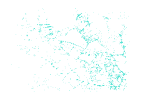

In [12]:
gplot(graph, locs_x, -locs_y, arrowlengthfrac=0.0)

In [13]:
calc_cosine_dist(p1, p2) = dot(p1, p2) / (norm(p1) * norm(p2))

calc_euclidean_dist(p1, p2) = norm(p1 - p2)

function encode_edges(G, parent, node, src, dst)
    
    ret = fill(0.0, (max_out_degree, 7))
    
    x_u = norm_locs_x[node]
    y_u = norm_locs_y[node]
    x_dst = norm_locs_x[dst]
    y_dst = norm_locs_y[dst]

    for (idx, out_neighbor) in enumerate(outneighbors(G, node))
        
        out_neighbor == parent && continue
        
        x_v = norm_locs_x[out_neighbor]
        y_v = norm_locs_y[out_neighbor]
        
        ret[idx, 1] = 0.0
        ret[idx, 2] = g_distmx[node, out_neighbor]
        ret[idx, 3] = calc_cosine_dist([x_v-x_u, y_v-y_u], [x_dst-x_u, y_dst-y_u])
        ret[idx, 4] = calc_euclidean_dist([x_v, y_v], [x_dst, y_dst])
        ret[idx, 5] = x_v
        ret[idx, 6] = y_v
        
        ret[idx, end] = out_neighbor
        
    end
    
    return (ret, x_dst, y_dst)
    
end

encode_edges (generic function with 1 method)

In [14]:
function generate_stochastic_dataset(G; sample_size_lower_bound=100, verbose_frequent=10)
    
    pair_path_dict = Dict()
    sample_cnt = 0
    X = []
    y = []
    
    while true
        src = rand(1:num_nodes)
        dst = rand(1:num_nodes)
        
        src == dst && continue
        
        (src, dst) in keys(edge_weights) && continue    
        
        for (src, dst) in [(src, dst), (dst, src)]
    
            path = a_star(graph, src, dst, g_distmx)
            
            length(path) == 0 && break
            
            pair_path_dict[(src, dst)] = path
            
            parent_node = 0
            cur_node = src
            
            for edge in path
                
#                 println("parent:($(parent_node)), X:($(cur_node), $(dst)), y:($(edge.dst))")
                
                
                push!(X, encode_edges(G, parent_node, cur_node, src, dst))
                push!(y, edge.dst)
                
                parent_node = cur_node
                cur_node = edge.dst
                
                sample_cnt += 1
                sample_cnt % verbose_frequent == 0 && println("Collected $(sample_cnt) samples.")
            end
        end
        
        sample_cnt >= sample_size_lower_bound && break
        
    end
    
    return X, y, pair_path_dict, sample_cnt
    
end

generate_stochastic_dataset (generic function with 1 method)

In [15]:
@time begin
features, labels, pair_path_dict, sample_cnt = generate_stochastic_dataset(graph, sample_size_lower_bound=10000, verbose_frequent=2000);
end
@assert length(features) == length(labels) == sample_cnt

Collected 2000 samples.
Collected 4000 samples.
Collected 6000 samples.
Collected 8000 samples.
Collected 10000 samples.
 24.509224 seconds (25.26 M allocations: 940.895 MiB, 1.92% gc time)


In [16]:
pair_path_dict

Dict{Any,Any} with 186 entries:
  (3252, 2289) => LightGraphs.SimpleGraphs.SimpleEdge[Edge 3252 => 869, Edge 86…
  (396, 3372)  => LightGraphs.SimpleGraphs.SimpleEdge[Edge 396 => 705, Edge 705…
  (3114, 1410) => LightGraphs.SimpleGraphs.SimpleEdge[Edge 3114 => 1812, Edge 1…
  (1637, 151)  => LightGraphs.SimpleGraphs.SimpleEdge[Edge 1637 => 1078, Edge 1…
  (3159, 2198) => LightGraphs.SimpleGraphs.SimpleEdge[Edge 3159 => 1091, Edge 1…
  (2053, 1668) => LightGraphs.SimpleGraphs.SimpleEdge[Edge 2053 => 2196, Edge 2…
  (3426, 623)  => LightGraphs.SimpleGraphs.SimpleEdge[Edge 3426 => 1869, Edge 1…
  (699, 631)   => LightGraphs.SimpleGraphs.SimpleEdge[Edge 699 => 3122, Edge 31…
  (631, 699)   => LightGraphs.SimpleGraphs.SimpleEdge[Edge 631 => 2642, Edge 26…
  (3146, 3041) => LightGraphs.SimpleGraphs.SimpleEdge[Edge 3146 => 179, Edge 17…
  (2622, 2480) => LightGraphs.SimpleGraphs.SimpleEdge[Edge 2622 => 255, Edge 25…
  (689, 2451)  => LightGraphs.SimpleGraphs.SimpleEdge[Edge 689 => 969, Edge 9

In [17]:
max_path_len = maximum(map(e -> length(e), values(pair_path_dict)))
println(max_path_len)

109


# Is data augmentation really helpful?
Perhap when overdone, data augmentation only makes it harder to train.
As of this moment, data augmentation will be ignored.

In [18]:
function find_label_idx(feature, label)
    
    num_row = size(feature)[1]
    ret_idx = 1
    
    for row_idx in 1:num_row
        if feature[row_idx, end] == label
            ret_idx = row_idx
        end
    end
    
    ret_idx
end

function augment_dataset(X, y; aug_multiple=20, verbose_frequent=500)
    
    org_sample_size = length(y)
    aug_sample_size = aug_multiple * org_sample_size
    feature_size = max_out_degree * 6 + 2
    
    X_aug, y_aug = zeros(Float32, aug_sample_size, feature_size), zeros(Int, aug_sample_size)
    indices = 1:max_out_degree
    
    cur_sample_idx = 1
    
    for pair in zip(X, y)
        feature = pair[1]
        label = pair[2]
        
        for _ in 1:aug_multiple
             
#             shuffled_indices = shuffle(MersenneTwister(now().instant.periods.value), indices)
            shuffled_indices = indices
            feature_tmp = feature[1][shuffled_indices, :]
            label_tmp = find_label_idx(feature_tmp, label)
            
            feature_tmp = transpose(feature_tmp[:, 1:end-1])

            
            X_aug[cur_sample_idx, :] = push!(vcat(feature_tmp...), feature[2], feature[3])
            y_aug[cur_sample_idx] = label_tmp - 1
            
            cur_sample_idx += 1
            
            if cur_sample_idx % verbose_frequent == 0
                println("Processed $(cur_sample_idx) samples")
            end
        end
    end
    
    return transpose(X_aug), y_aug
end

augment_dataset (generic function with 1 method)

In [19]:
X, y = augment_dataset(features, labels, aug_multiple=1, verbose_frequent=5000)

println(size(X))
println(size(y))

Processed 5000 samples
Processed 10000 samples
(26, 10041)
(10041,)


In [20]:
count(x -> x == 0, y)

7342

In [21]:
split_at = [rand() > 0.2 for i in 1:length(y)]

X_train = X[:, split_at]
y_train = y[split_at]

X_val = X[:, .!split_at]
y_val = y[.!split_at];

In [22]:
println(size(X_train))
println(size(y_train))
println(size(X_val))
println(size(y_val))

(26, 8005)
(8005,)
(26, 2036)
(2036,)


In [23]:
function build_model(context)

    mlp = @mx.chain mx.Variable(:data)             =>
      mx.FullyConnected(name=:fc1, num_hidden=1024) =>
      mx.Activation(name=:relu1, act_type=:relu)   =>
      mx.FullyConnected(name=:fc2, num_hidden=512)  =>
      mx.Activation(name=:relu2, act_type=:relu)   =>
      mx.FullyConnected(name=:fc3, num_hidden=max_out_degree)  =>
      mx.SoftmaxOutput(name=:softmax)
    
    return mx.FeedForward(mlp, context=context)
end

build_model (generic function with 1 method)

# First overfit the entire dataset

In [24]:
batch_size = 128

train_provider = mx.ArrayDataProvider(X, y, batch_size=batch_size, shuffle=true)
val_provider = mx.ArrayDataProvider(X, y, batch_size=batch_size);

In [25]:
model = build_model(mx.gpu())

MXNet.mx.FeedForward(MXNet.mx.SymbolicNode softmax, MXNet.mx.Context[GPU0], #undef, #undef, #undef)

In [26]:
mx.fit(model, mx.ADAM(),
    train_provider,
    n_epoch=150,
    eval_data=val_provider,
    verbosity=3)

INFO: Start training on MXNet.mx.Context[GPU0]
INFO: Initializing parameters...
INFO: Creating KVStore...
INFO: TempSpace: Total 2 MB allocated on GPU0
INFO: Start training...
INFO: == Epoch 001/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.8125
INFO:               time = 3.8470 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.8828
INFO: == Epoch 002/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.8830
INFO:               time = 0.9223 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.8901
INFO: == Epoch 003/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.8836
INFO:               time = 0.6786 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.8908
INFO: == Epoch 004/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.8873
INFO:               time = 0.6762 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.8908
INFO: == Epoch 005/150 =========

INFO: ## Training summary
INFO:           accuracy = 0.9063
INFO:               time = 0.6541 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9123
INFO: == Epoch 023/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9082
INFO:               time = 0.6474 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9080
INFO: == Epoch 024/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9062
INFO:               time = 0.6488 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9138
INFO: == Epoch 025/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9104
INFO:               time = 0.7074 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9160
INFO: == Epoch 026/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9073
INFO:               time = 0.6453 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9154
INFO: == Epoch 027/150 ==========
INFO: ## T

INFO: ## Training summary
INFO:           accuracy = 0.9204
INFO:               time = 0.6332 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9275
INFO: == Epoch 046/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9225
INFO:               time = 0.6254 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9184
INFO: == Epoch 047/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9244
INFO:               time = 0.6595 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9268
INFO: == Epoch 048/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9227
INFO:               time = 0.6442 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9239
INFO: == Epoch 049/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9223
INFO:               time = 0.6485 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9268
INFO: == Epoch 050/150 ==========
INFO: ## T

INFO: ## Training summary
INFO:           accuracy = 0.9330
INFO:               time = 0.6512 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9367
INFO: == Epoch 069/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9338
INFO:               time = 0.6437 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9377
INFO: == Epoch 070/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9335
INFO:               time = 0.6457 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9382
INFO: == Epoch 071/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9346
INFO:               time = 0.7133 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9413
INFO: == Epoch 072/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9338
INFO:               time = 0.6630 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9327
INFO: == Epoch 073/150 ==========
INFO: ## T

INFO: ## Training summary
INFO:           accuracy = 0.9402
INFO:               time = 0.6471 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9494
INFO: == Epoch 092/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9429
INFO:               time = 0.6476 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9470
INFO: == Epoch 093/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9422
INFO:               time = 0.6455 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9465
INFO: == Epoch 094/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9471
INFO:               time = 0.6408 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9496
INFO: == Epoch 095/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9471
INFO:               time = 0.6417 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9541
INFO: == Epoch 096/150 ==========
INFO: ## T

INFO: ## Training summary
INFO:           accuracy = 0.9528
INFO:               time = 0.6509 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9449
INFO: == Epoch 115/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9531
INFO:               time = 0.6441 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9553
INFO: == Epoch 116/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9530
INFO:               time = 0.8094 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9572
INFO: == Epoch 117/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9542
INFO:               time = 0.6555 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9600
INFO: == Epoch 118/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9560
INFO:               time = 0.6516 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9628
INFO: == Epoch 119/150 ==========
INFO: ## T

INFO: ## Training summary
INFO:           accuracy = 0.9631
INFO:               time = 0.6540 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9651
INFO: == Epoch 138/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9630
INFO:               time = 0.6528 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9688
INFO: == Epoch 139/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9617
INFO:               time = 0.6565 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9659
INFO: == Epoch 140/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9641
INFO:               time = 0.6883 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9727
INFO: == Epoch 141/150 ==========
INFO: ## Training summary
INFO:           accuracy = 0.9625
INFO:               time = 0.6542 seconds
INFO: ## Validation summary
INFO:           accuracy = 0.9669
INFO: == Epoch 142/150 ==========
INFO: ## T

In [27]:
using MLBase

pred = mx.predict(model, 
        mx.ArrayDataProvider(X, batch_size=batch_size), verbosity=0)

pred = map(i -> indmax(pred[:, i]), 1:length(y))

confusmat(max_out_degree, y+1, pred)

4×4 Array{Int64,2}:
 7207   133    2   0
  129  2199    0   0
    1     1  354   0
    0     0    0  15

In [28]:
function nn_infer_next_node(G, parent, cur_node, src, dst, model)

    input_vec, x_dst, y_dst = encode_edges(G, parent, cur_node, src, dst)
    real_input_vec = push!(vcat(transpose(input_vec[:, 1:end-1])...), x_dst, y_dst)
    
    pred = mx.predict(model, mx.ArrayDataProvider(reshape(real_input_vec, :, 1)), verbosity=0)
    pred_idx = findmax(pred)[2]
    neighbor = Int(input_vec[pred_idx, end])
    
    if neighbor == 0
        
        avaliable_neighbors = filter(x -> x > 0, input_vec[:, end])
        
        if length(avaliable_neighbors) != 0
            println("Invalid prediction, randomizing next node")
            neighbor = Int(avaliable_neighbors[rand(1:end)])
        else
            # TODO the algorithm can be made smarter
            return -1, 0
        end
    end
    
    return neighbor, edge_weights[(cur_node, neighbor)]
end

function dijkstra_path_finder(G, src, dst, model; invalid_path_len_threshold=200)
    
    path = [src]
    parent_node = 0
    cur_node = src
    total_weights = 0.0
    
    while true
        if length(path) >= invalid_path_len_threshold
            return path, total_weights, false
        end
        
        next_node, weight = nn_infer_next_node(G, parent_node, cur_node, src, dst, model)
        
        if next_node == -1
            
            if !has_edge(G, (cur_node, parent_node))
                return path, total_weights, false
            end
            
            println("No available node to choose, turning back")
            parent_node, cur_node = cur_node, parent_node
            continue
        end
        
        total_weights += weight
        push!(path, next_node)
        
        if next_node == dst
            return path, total_weights, true
        end
        
        parent_node = cur_node
        cur_node = next_node
    end

end

function build_ground_truth_path(src, dst)
    
    edges = pair_path_dict[(src, dst)]
    
    path = [edges[1].src]
    
    for edge in edges
       push!(path, edge.dst) 
    end
    
    path
end

build_ground_truth_path (generic function with 1 method)

In [29]:
function calc_statistics(G, num_to_test)
   
    found_cnt = 0
    opt_path_cnt = 0
    
    pairs = shuffle(collect(keys(pair_path_dict)))[1:num_to_test]
    
    for pair in pairs
        src, dst = pair[1], pair[2]

        nn_path, _, found = dijkstra_path_finder(G, src, dst, model, 
                                invalid_path_len_threshold=max_path_len * 2)
        dijkstra_path = build_ground_truth_path(src, dst)
        
        found == false && continue
        
        found_cnt += 1
        
        if nn_path == dijkstra_path
            opt_path_cnt += 1
        else
            println(nn_path)
            println(dijkstra_path)
        end
    end
    
    return found_cnt, opt_path_cnt
end

calc_statistics (generic function with 1 method)

In [30]:
function print_paths_statistics(G, num_to_test)

    num_total_path = num_to_test

    found_cnt, opt_path_cnt = calc_statistics(G, num_to_test)
    
    @printf "%d out of %d can find path: %f\n" found_cnt num_total_path float(found_cnt)/num_total_path
    @printf "%d out of %d can find optimal path: %f\n" opt_path_cnt found_cnt float(opt_path_cnt)/found_cnt
    @printf "%d out of %d all paths can find optimal paths: %f\n" opt_path_cnt num_total_path float(opt_path_cnt)/num_total_path
    
end

print_paths_statistics (generic function with 1 method)

In [31]:
print_paths_statistics(graph, 10)

[1247, 449, 1951, 2251, 816, 3199, 3194, 444, 1060, 2405, 2160, 258, 3473, 1750, 2236, 1202, 402, 2669, 259, 3140, 130, 3425, 210, 3479, 920, 2990, 1515, 2195, 13, 1502, 1221, 3271, 2444, 3441, 2419, 97, 898, 1167, 695, 3110, 2086, 2725, 735, 262, 239, 759, 2635, 1154, 2106, 3438, 859, 3290, 1352, 3378]
[1247, 449, 1951, 2251, 816, 3199, 3194, 444, 1060, 2405, 2160, 258, 3473, 1750, 2236, 1202, 402, 2669, 259, 880, 2952, 3064, 893, 653, 3344, 2166, 770, 1040, 1215, 2995, 3290, 1352, 3378]
No available node to choose, turning back
[289, 2968, 1698, 2187, 377, 1265, 1827, 835, 1429, 726, 2497, 1763, 29, 1574, 3066, 2852, 2855, 763, 3, 3033, 2381, 2307, 3304, 1054, 2932, 2181, 2173, 1271, 1274, 3193, 2786, 1859, 3282, 496, 2441, 890, 1990, 3332, 1919, 2791, 1162, 2566, 2183, 2223, 436, 3414, 2634, 2743, 1025, 1168, 2362, 48, 150, 1579, 1833, 412, 906, 1445, 1244, 3090, 1002, 2493, 2626, 448, 1684, 3058, 3136, 1674, 654, 1046, 2546, 623, 24, 2254, 3197, 712, 516, 3307, 661, 1413, 2443, 661

No available node to choose, turning back
No available node to choose, turning back
5 out of 10 can find path: 0.500000
1 out of 5 can find optimal path: 0.200000
1 out of 10 all paths can find optimal paths: 0.100000


# N.B.

When the model is able to find the optimal path
with high probability, the model has learned well.

In [ ]:
percentage_found = []
percentage_opt_found = []
percentage_opt_all = []

for _ in 1:10
    num_total_path = 200
    
    found_cnt, opt_path_cnt = calc_statistics(graph, num_total_path)
    push!(percentage_found, found_cnt/num_total_path)
    push!(percentage_opt_found, opt_path_cnt/found_cnt)
    push!(percentage_opt_all, opt_path_cnt/num_total_path)
end

In [ ]:
using PyPlot

boxplot([percentage_found, percentage_opt_found, percentage_opt_all],
        labels=["found/all", "opt/found", "opt/all"]) # Basic

In [32]:
using PyPlot
using PyCall

@pyimport networkx as nx

distmx = fill(Inf, (num_nodes, num_nodes))

function build_networkx_graph(julia_graph)
    
    
    
    G = nx.DiGraph()
    
    for (edge, _) in edgeDict
#         print(node, coord[0], coord[1])
        weight = (0.5 * rand() + 0.5) * 
                        calc_euclidean_dist([norm_locs_x[edge.src], norm_locs_y[edge.src]], 
                                            [norm_locs_x[edge.dst], norm_locs_y[edge.dst]])
        nx.add_path(G, [edge.src, edge.dst], weight=weight)
        distmx[edge.src, edge.dst] = weight
    end
    
    G
end

function build_ground_truth_path(path_edges)
    
    path = [path_edges[1].src]
    edges = []
    
    for edge in path_edges
        push!(path, edge.dst)
        push!(edges, (edge.src, edge.dst))
    end
    
    return path, edges
end

build_ground_truth_path (generic function with 2 methods)

In [33]:
G = build_networkx_graph(graph)

PyObject <networkx.classes.digraph.DiGraph object at 0x7f099842ed90>

In [41]:
pos = Dict()

for node in 1:nv(graph)
    pos[node] = (locs_x[node], locs_y[node])
end

node_color = ["c" for _ in 1:nv(graph)];
node_size = [0.01 for _ in 1:nv(graph)];

In [43]:
[1417, 2228, 2855, 763, 3, 3475, 2886, 1173, 2181, 2932, 2262, 2720, 1050, 252, 3078, 1033, 1279, 2226, 2964, 434, 3131, 850, 2898, 369, 739, 1492, 1780, 1996, 2653, 2910, 251, 2524, 483, 545, 2832, 2486, 596, 3415, 127, 1039, 3351, 2764, 1562, 1667, 2078, 665, 551, 2747, 2856, 2432, 2556, 3034, 1899, 561, 2583, 3176, 80, 2723, 2514, 1960, 1099, 838, 1771, 1249, 999, 1804, 2748, 2905, 3356, 1123, 1309]
[1417, 2228, 763, 3, 3475, 2886, 1173, 2173, 1271, 1274, 2121, 1238, 529, 897, 3266, 1439, 2639, 1719, 155, 169, 2699, 2096, 1292, 273, 13, 1502, 2216, 1101, 1640, 127, 1039, 3351, 2764, 1562, 1667, 2078, 665, 551, 2747, 2856, 2432, 2556, 3034, 1899, 561, 2583, 3176, 80, 2723, 2514, 1960, 1099, 838, 1771, 1249, 999, 1804, 2748, 2905, 3356, 1123, 1309];

In [44]:
gt_path_nodes = [1417, 2228, 763, 3, 3475, 2886, 1173, 2173, 1271, 1274, 2121, 1238, 529, 897, 3266, 1439, 2639, 1719, 155, 169, 2699, 2096, 1292, 273, 13, 1502, 2216, 1101, 1640, 127, 1039, 3351, 2764, 1562, 1667, 2078, 665, 551, 2747, 2856, 2432, 2556, 3034, 1899, 561, 2583, 3176, 80, 2723, 2514, 1960, 1099, 838, 1771, 1249, 999, 1804, 2748, 2905, 3356, 1123, 1309]
nn_path_nodes = [1417, 2228, 2855, 763, 3, 3475, 2886, 1173, 2181, 2932, 2262, 2720, 1050, 252, 3078, 1033, 1279, 2226, 2964, 434, 3131, 850, 2898, 369, 739, 1492, 1780, 1996, 2653, 2910, 251, 2524, 483, 545, 2832, 2486, 596, 3415, 127, 1039, 3351, 2764, 1562, 1667, 2078, 665, 551, 2747, 2856, 2432, 2556, 3034, 1899, 561, 2583, 3176, 80, 2723, 2514, 1960, 1099, 838, 1771, 1249, 999, 1804, 2748, 2905, 3356, 1123, 1309]
# Mark ground truth path
node_color[gt_path_nodes[end]] = "g"
node_color[gt_path_nodes[1]] = "k"

node_size[gt_path_nodes[1]] = 20
node_size[gt_path_nodes[end]] = 20

for node in gt_path_nodes[2:end-1]
    node_color[node] = "r"
    node_size[node] = 1
end

# Mark nn path
for node in nn_path_nodes[2:end-1]
    node_color[node] = "b"
    node_size[node] = 1
end

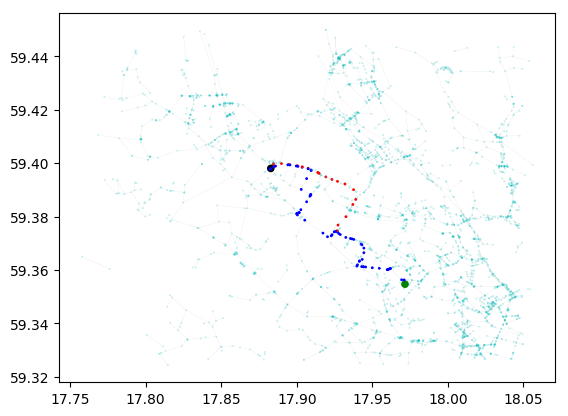

In [45]:
nx.draw_networkx(G, pos=pos, 
                    with_labels=false,
                    nodelist=1:nv(graph),
                    node_size=node_size, 
                    width=0.01,
                    arrows=false,
                    node_color=node_color)

In [338]:
println(locs_y[gt_path_nodes[1]], ",", locs_x[gt_path_nodes[1]])
println(locs_y[gt_path_nodes[2]], ",", locs_x[gt_path_nodes[2]])
println(locs_y[gt_path_nodes[3]], ",", locs_x[gt_path_nodes[3]])
println(locs_y[gt_path_nodes[end]], ",", locs_x[gt_path_nodes[end]])

59.4048694,17.9409198
59.4044759,17.9415944
59.4043981,17.9416995
59.3353246,17.9305975


In [344]:
for node in gt_path_nodes
     println(locs_y[node], ",", locs_x[node])
end

59.4048694,17.9409198
59.4044759,17.9415944
59.4043981,17.9416995
59.4048199,17.9428478
59.4048212,17.9429358
59.4042547,17.9442193
59.4030869,17.9457456
59.4023647,17.9466353
59.40217,17.9467437
59.4019566,17.9470043
59.401719,17.9474305
59.3997222,17.9495196
59.3992123,17.9498995
59.3990502,17.9498002
59.3987548,17.9501427
59.3986905,17.9504732
59.3970333,17.9518237
59.396593,17.9514341
59.396298,17.9511611
59.3954949,17.9506204
59.394095,17.9494609
59.393397,17.9490028
59.3927504,17.9486273
59.3916268,17.9479932
59.3898374,17.9455186
59.3871694,17.9395459
59.3864215,17.9390323
59.3845353,17.9371174
59.3840708,17.9364145
59.382646,17.9350239
59.38263,17.934954
59.3823305,17.934687
59.3823,17.9346979
59.3799518,17.9324979
59.3767946,17.9272914
59.3732697,17.9287971
59.3721792,17.9324362
59.3717752,17.9355326
59.3716309,17.9365572
59.3714396,17.9377347
59.3697329,17.9425777
59.3693894,17.9431348
59.3681775,17.9444075
59.3664576,17.9443841
59.3639398,17.9433082
59.3615735,17.943188
59.3